Model Performance Summary:
Baseline Logistic Regression Accuracy: 0.8000
Tuned SVM Accuracy: 0.8950
AdaBoost Accuracy: 0.7400

Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       113
           1       0.88      0.89      0.88        87

    accuracy                           0.90       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.90      0.90      0.90       200


Confusion Matrix (SVM):
[[102  11]
 [ 10  77]]


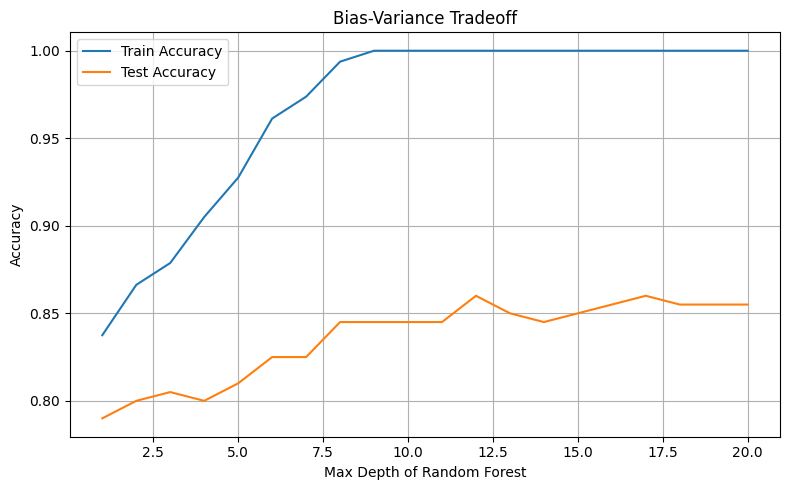

In [1]:
# ml_finance_project_full.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Step 1: Create synthetic dataset to simulate financial features
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=6,
    n_redundant=2,
    n_classes=2,
    random_state=42
)

df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])
df["target"] = y
df.to_csv("sample_financial_data.csv", index=False)

# Step 2: Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Hyperparameter Tuning using GridSearchCV for SVM
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

best_svm = grid.best_estimator_
svm_preds = best_svm.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, svm_preds)

# Step 4: Bias-Variance visualization using Random Forest depth
train_scores, test_scores = [], []
depths = range(1, 21)

for depth in depths:
    rf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf.fit(X_train_scaled, y_train)
    train_scores.append(rf.score(X_train_scaled, y_train))
    test_scores.append(rf.score(X_test_scaled, y_test))

plt.figure(figsize=(8, 5))
plt.plot(depths, train_scores, label="Train Accuracy")
plt.plot(depths, test_scores, label="Test Accuracy")
plt.xlabel("Max Depth of Random Forest")
plt.ylabel("Accuracy")
plt.title("Bias-Variance Tradeoff")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("bias_variance_tradeoff.png")

# Step 5: Ensemble method using AdaBoost
boost = AdaBoostClassifier(n_estimators=100, random_state=42)
boost.fit(X_train_scaled, y_train)
boost_preds = boost.predict(X_test_scaled)
boost_acc = accuracy_score(y_test, boost_preds)

# Step 6: Compare with baseline model (Logistic Regression)
base_model = LogisticRegression()
base_model.fit(X_train_scaled, y_train)
base_preds = base_model.predict(X_test_scaled)
base_acc = accuracy_score(y_test, base_preds)

# Step 7: Print results and evaluation
print("Model Performance Summary:")
print(f"Baseline Logistic Regression Accuracy: {base_acc:.4f}")
print(f"Tuned SVM Accuracy: {svm_acc:.4f}")
print(f"AdaBoost Accuracy: {boost_acc:.4f}")
print("\nClassification Report (SVM):")
print(classification_report(y_test, svm_preds))
print("\nConfusion Matrix (SVM):")
print(confusion_matrix(y_test, svm_preds))

# Optional: Save performance summary to CSV
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Tuned SVM", "AdaBoost"],
    "Accuracy": [base_acc, svm_acc, boost_acc]
})
results_df.to_csv("model_performance_summary.csv", index=False)
